In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from PIL import Image
import cv2
print(cv2.__version__)

sns.set(style="whitegrid")

train_csv_path = os.path.join('..','data', 'train_labels.csv')
df = pd.read_csv(train_csv_path)

df.rename(columns={'Bags used': 'bags_used', 'Pothole number': 'pothole_number'}, inplace=True)


4.10.0


In [28]:
df.head()
print(df.columns)


Index(['pothole_number', 'Bags used '], dtype='object')


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pothole_number  644 non-null    int64  
 1   Bags used       644 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 10.2 KB


## Distribution of the target variable

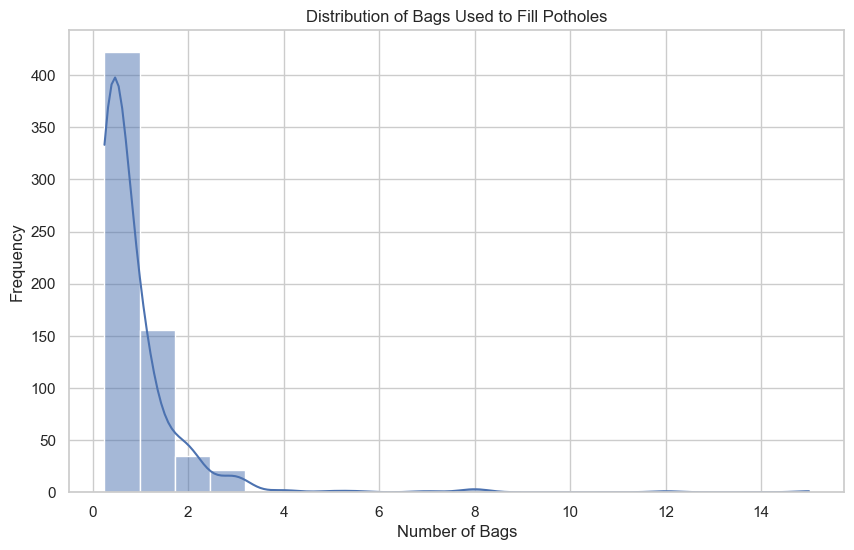

In [30]:
df.rename(columns={'Bags used ': 'bags_used'}, inplace=True)
df.rename(columns={'Pothole number': 'pothole_number'}, inplace=True)


plt.figure(figsize=(10, 6))
sns.histplot(df['bags_used'], kde=True, bins=20)
plt.title('Distribution of Bags Used to Fill Potholes')
plt.xlabel('Number of Bags')
plt.ylabel('Frequency')
plt.show()



In [31]:

description = df['bags_used'].describe()
print(description)

value_counts = df['bags_used'].value_counts().sort_index()
print("\nCount of each unique value in 'bags_used':")
print(value_counts)


count    644.000000
mean       0.865140
std        1.121281
min        0.250000
25%        0.500000
50%        0.500000
75%        1.000000
max       15.000000
Name: bags_used, dtype: float64

Count of each unique value in 'bags_used':
bags_used
0.25     140
0.50     278
0.55       4
1.00     116
1.05       3
1.50      35
1.55       2
2.00      34
2.05       1
2.50       7
3.00      12
3.05       1
3.10       1
4.00       2
5.00       1
5.50       1
7.00       1
8.00       3
12.00      1
15.00      1
Name: count, dtype: int64


## Reading the YOLO Annotations

In [32]:
def read_yolo_annotation(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    annotations = []
    for line in lines:
        parts = line.strip().split()
        label = int(parts[0])
        x_center, y_center, width, height = map(float, parts[1:])
        annotations.append((label, x_center, y_center, width, height))
    return annotations


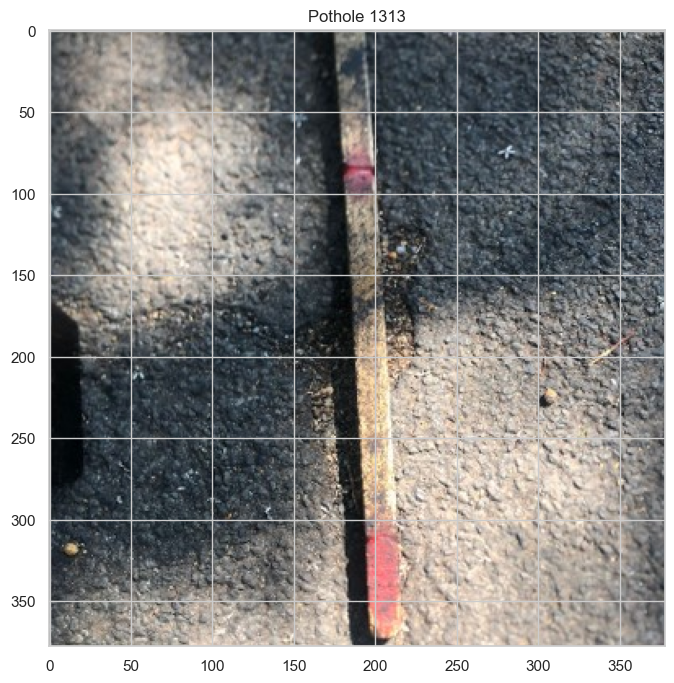

In [33]:
pothole_id = 1313

# Construct file paths based on the pothole id
image_filename = f'p{pothole_id}.jpg'
annotation_filename = f'p{pothole_id}.txt'

sample_image_path = os.path.join('..','data', 'train_images', image_filename)
sample_annotation_path = os.path.join('..','data', 'train_annotations', annotation_filename)

# Load and display the image
image = cv2.imread(sample_image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.title(f'Pothole {pothole_id}')
plt.show()

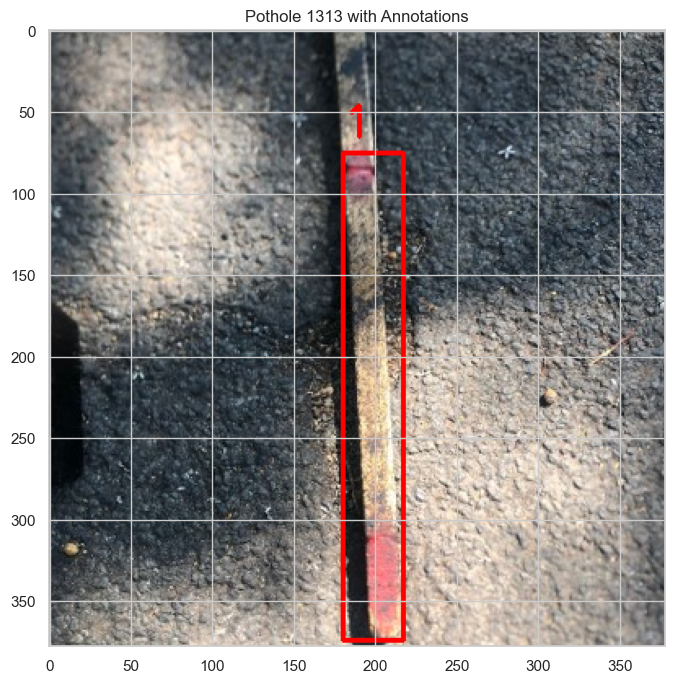

Details for Pothole 1313:
     pothole_number  bags_used
559            1313       0.25


In [34]:
annotations = read_yolo_annotation(sample_annotation_path)

# Convert YOLO format to bounding box coordinates and draw them on the image
image_height, image_width, _ = image.shape
for annotation in annotations:
    label, x_center, y_center, width, height = annotation
    x_min = int((x_center - width / 2) * image_width)
    x_max = int((x_center + width / 2) * image_width)
    y_min = int((y_center - height / 2) * image_height)
    y_max = int((y_center + height / 2) * image_height)
    cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
    cv2.putText(image_rgb, str(label), (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Display the image with annotations
plt.figure(figsize=(8, 8))
plt.imshow(image_rgb)
plt.title(f'Pothole {pothole_id} with Annotations')
plt.show()

# Display the corresponding row in the train_labels.csv
pothole_info = df[df['pothole_number'] == pothole_id]
print(f"Details for Pothole {pothole_id}:")
print(pothole_info)